# Project: Investigate a Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# TMDB MOVIE DATASET

> **Which genres are most popular from year to year? **

In [69]:
path = 'D:\\Dropbox\\01. UDACITY\\Datasets'
file_tmdb = 'tmdb-movies.csv'
path_tmdb = os.path.join(path, file_tmdb)

tmdb = pd.read_csv(path_tmdb) 
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [70]:
tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [71]:
# split genres col based on "|"
tmdb['genre1'], tmdb['genre2'], tmdb['genre3'], tmdb['genre4'], tmdb['genre5'] = tmdb['genres'].str.split('|', 5).str
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,NaN
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,NaN
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,NaN,NaN
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,NaN
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,NaN,NaN


In [72]:
tmdb.shape

(10866, 26)

In [73]:
# now transform the data from wide to long format
tmdb_long = pd.melt(tmdb, id_vars=['id', 'imdb_id', 'original_title', 'release_year'],
                    value_vars=['genre1', 'genre2', 'genre3', 'genre4', 'genre5'],
                    value_name='genre')
tmdb_long.head()

,id,imdb_id,original_title,release_year,variable,genre
0,135397,tt0369610,Jurassic World,2015,genre1,Action
1,76341,tt1392190,Mad Max: Fury Road,2015,genre1,Action
2,262500,tt2908446,Insurgent,2015,genre1,Adventure
3,140607,tt2488496,Star Wars: The Force Awakens,2015,genre1,Action
4,168259,tt2820852,Furious 7,2015,genre1,Action


In [74]:
# drop the 'variable' column since it's not useful anymore
tmdb_long.drop('variable', inplace=True, axis=1)
tmdb_long.head()

,id,imdb_id,original_title,release_year,genre
0,135397,tt0369610,Jurassic World,2015,Action
1,76341,tt1392190,Mad Max: Fury Road,2015,Action
2,262500,tt2908446,Insurgent,2015,Adventure
3,140607,tt2488496,Star Wars: The Force Awakens,2015,Action
4,168259,tt2820852,Furious 7,2015,Action


In [75]:
print('Original data shape: {}'.format(tmdb.shape))
print('Transformed data shape: {}'.format(tmdb_long.shape))

Original data shape: (10866, 26)
Transformed data shape: (54330, 5)


In [76]:
genre_yr = tmdb_long.groupby(['genre', 'release_year']).imdb_id.count()

In [77]:
genre_yr.head()

genre   release_year
Action  1960            8
        1961            7
        1962            8
        1963            4
        1964            5
Name: imdb_id, dtype: int64

In [78]:
genre_yr_reset = genre_yr.reset_index()
genre_yr_reset.head()

,genre,release_year,imdb_id
0,Action,1960,8
1,Action,1961,7
2,Action,1962,8
3,Action,1963,4
4,Action,1964,5


In [79]:
genre_yr_reset.rename(columns={'imdb_id': 'count'}, inplace=True)
genre_yr_reset.head()

,genre,release_year,count
0,Action,1960,8
1,Action,1961,7
2,Action,1962,8
3,Action,1963,4
4,Action,1964,5


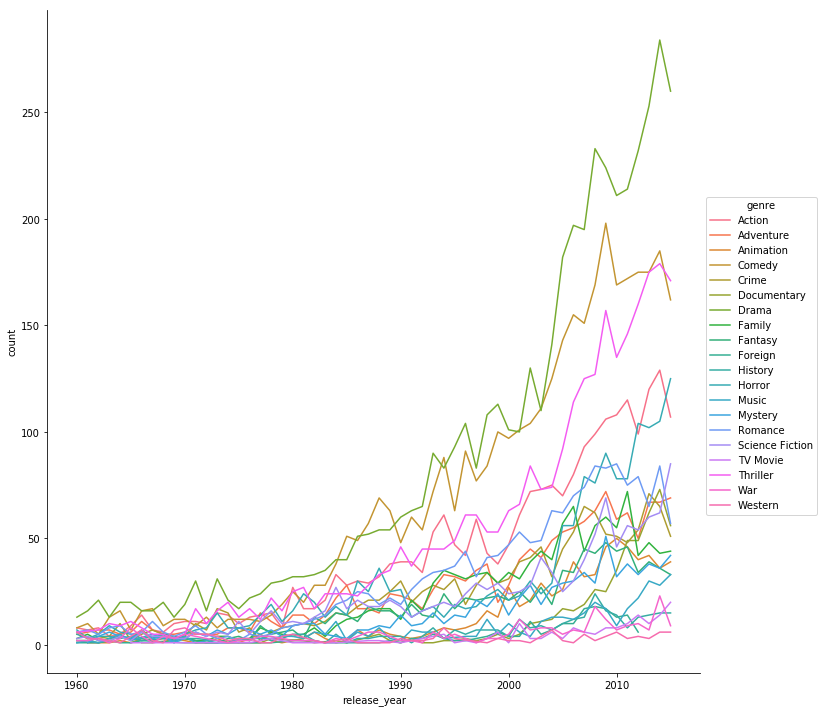

In [80]:
fig = sns.FacetGrid(data=genre_yr_reset, hue='genre', size=10)
fig.map(plt.plot, 'release_year', 'count').add_legend()

> **What kinds of properties are associated with movies that have high revenues?**

In [81]:
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,NaN
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,NaN
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,NaN,NaN
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,NaN
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,NaN,NaN


Let's explore the relationship between revenue and the following variables:budget, popularity, vote_average

The best way to do this would be to use boxplots to show the variables for different revenue groups. Let's now create the revenue groups.

In [82]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 26 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [83]:
tmdb.revenue.describe()

count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [85]:
# remove all the zero revenue rows
tmdb_sub = tmdb.copy()[tmdb.revenue!=0]
tmdb_sub.shape

(4850, 26)

In [86]:
# now let's get the quartiles
bins = tmdb_sub.revenue.quantile([.25, .50, .75, 1])

In [87]:
bins = bins.tolist()
bins

[7708081.25, 31826540.0, 99918234.25, 2781505847.0]

In [88]:
bins = [0] + bins
bins

[0, 7708081.25, 31826540.0, 99918234.25, 2781505847.0]

In [89]:
labels=['Q1', 'Q2', 'Q3', 'Q4']

In [90]:
tmdb_sub['revenue_level'] = pd.cut(tmdb_sub.revenue, bins=bins, labels=labels)

In [91]:
tmdb_sub.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5,revenue_level
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,NaN,Q4
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,NaN,Q4
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,NaN,NaN,Q4
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,NaN,Q4
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,NaN,NaN,Q4


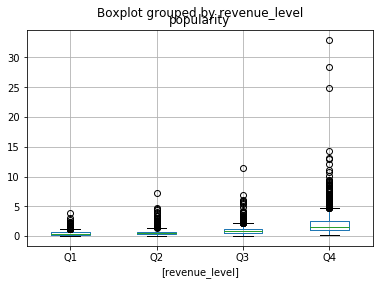

In [103]:
# popularity
tmdb_sub.loc[:,['popularity', 'revenue_level']].boxplot(by='revenue_level')

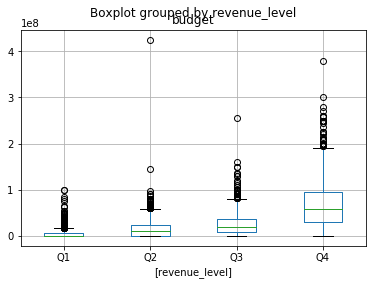

In [104]:
# budget
tmdb_sub.loc[:,['budget', 'revenue_level']].boxplot(by='revenue_level')

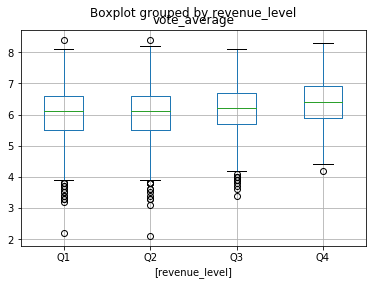

In [105]:
# popularity
tmdb_sub.loc[:,['vote_average', 'revenue_level']].boxplot(by='revenue_level')

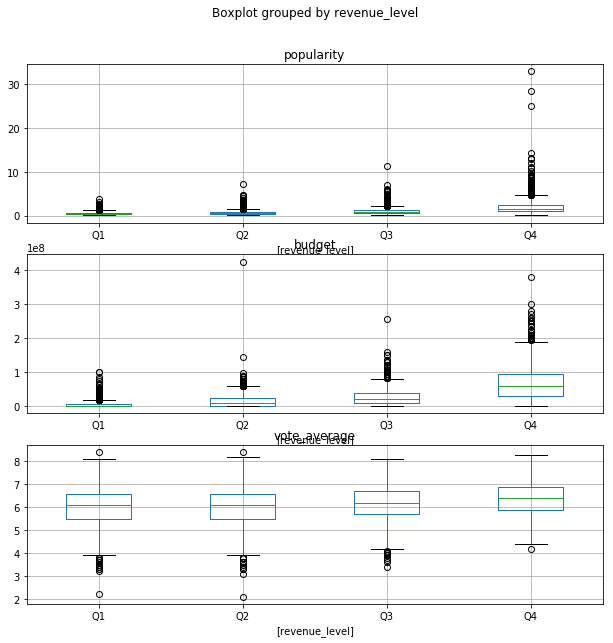

In [130]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=[10, 10])

tmdb_sub.loc[:,['popularity', 'revenue_level']].boxplot(by='revenue_level', ax=axes[0])

tmdb_sub.loc[:,['budget', 'revenue_level']].boxplot(by='revenue_level', ax=axes[1])

tmdb_sub.loc[:,['vote_average', 'revenue_level']].boxplot(by='revenue_level', ax=axes[2])    

# No-show appts

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [17]:
path = 'D:\\Dropbox\\01. UDACITY\\Datasets\\investigate-a-dataset'
file_tmdb = 'noshowappointments-kagglev2-may-2016.csv'
path_tmdb = os.path.join(path, file_tmdb)

noshow = pd.read_csv(path_tmdb) 
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
noshow.rename(columns=lambda x: x.lower(), inplace=True)
noshow.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
import numpy as np

def map_func(row):
    if row['no-show'] == 'No':
        return 0
    elif row['no-show'] == 'Yes':
        return 1
    else:
        return np.NaN

noshow['label'] = noshow.apply(lambda row: map_func(row), axis=1)
noshow.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,label
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


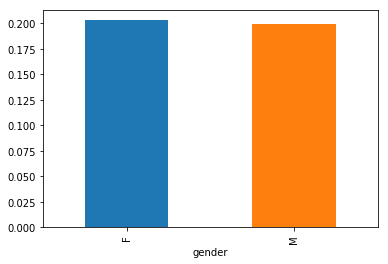

In [27]:
def find_percent(df, col_name):
    return noshow.groupby(col_name)['label'].mean()
new = find_percent(noshow, 'gender')
new.plot(kind='bar')

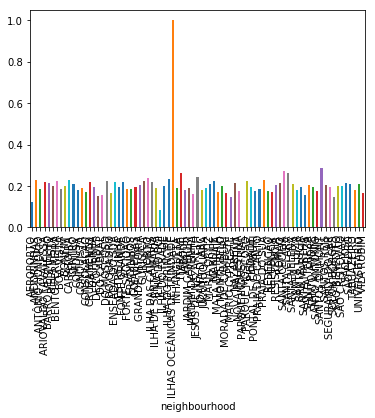

In [28]:
find_percent(noshow, 'neighbourhood').plot(kind='bar')

In [29]:
# make a new column breaking age col into buckets
bins = [0, 12, 18, 40, 60, 200]
grp_names = ['children', 'teenager', 'youth', 'midage', 'senior']
noshow['age_grp'] = pd.cut(noshow['age'], bins, labels=grp_names)
noshow.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,label,age_grp
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,senior
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,midage
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,senior
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,children
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,midage


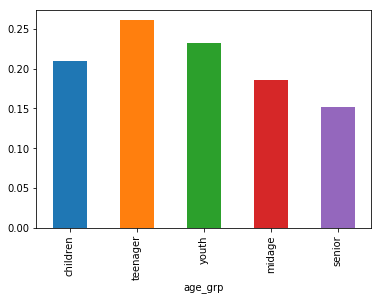

In [30]:
find_percent(noshow, 'age_grp').plot(kind='bar')

**Gapminder**: Have certain regions of the world been growing in your selected metrics better than others? Are there trends that can be observed between the selected metrics?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!